In [1]:
seed = 42  # for reproducibility

import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False
%matplotlib inline

import os
import sys
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
from sklearn.metrics import plot_confusion_matrix
torch.manual_seed(seed)
sys.path.append(str(Path().absolute().parent))
plt.style.use('seaborn')

In [7]:
exp_path = Path().absolute().parent.parent.joinpath('src/experiments/0221_FAvg60FR2EPR_ResNet50_TUNING')
clog_path = 'experiments/0222_FAvg60FR2EPR_ResNet50_TUNINGClient_Logs'
stge_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/stge')
jarv_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/jarv')
bcdr_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/bcdr')
inbreast_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/inbreast')
cmmd_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/cmmd')

In [8]:
pickle_file = 'log.pkl'
with open(exp_path.joinpath(pickle_file), 'rb') as handle:
    aggregated_metrics = pickle.load(handle)
    
with open(stge_path.joinpath(pickle_file), 'rb') as handle:
    stge_metrics = pickle.load(handle)
with open(jarv_path.joinpath(pickle_file), 'rb') as handle:
    jarv_metrics = pickle.load(handle)
    
with open(inbreast_path.joinpath(pickle_file), 'rb') as handle:
    inbreast_metrics = pickle.load(handle)
    
with open(bcdr_path.joinpath(pickle_file), 'rb') as handle:
    bcdr_metrics = pickle.load(handle)
    
with open(cmmd_path.joinpath(pickle_file), 'rb') as handle:
    cmmd_metrics = pickle.load(handle)

In [9]:
print(inbreast_metrics['GMLD_AUC'][-1], bcdr_metrics['GMLD_AUC'][-1], stge_metrics['GMLD_AUC'][-1], jarv_metrics['GMLD_AUC'][-1], cmmd_metrics['GMLD_AUC'][-1]) 

0.8132992327365729 0.9490740740740741 0.9403815309459912 0.9479052729924347 0.9287441822653091


In [10]:
final_r = list(inbreast_metrics['LMLD_val_AUC'].keys())[-1]

In [14]:
stge_metrics['LMLD_val_AUC']

{1: [0.5835753172872638, 0.6576293958962317],
 2: [0.6667413584647209, 0.7062943782846919],
 3: [0.6876109457117299, 0.7133206488314883],
 4: [0.7006929302247568, 0.6927362881583361],
 5: [0.7505818097953707, 0.7573984191546461],
 6: [0.7532200464050096, 0.8021069202169293],
 7: [0.7971152367773677, 0.7940480683215924],
 8: [0.8066356018673824, 0.8066024055126916],
 9: [0.8302749007603712, 0.8158554525886168],
 10: [0.8244699066308845, 0.854693440400313],
 11: [0.8593557810578105, 0.8652822039584034],
 12: [0.8498310480263893, 0.860846122665772],
 13: [0.8492453070837526, 0.864301601112602],
 14: [0.8548598589679077, 0.8634389326847813],
 15: [0.8386285887006599, 0.8560505597953707],
 16: [0.8921432964329643, 0.8836603174270379],
 17: [0.8685227796880242, 0.8807416589790897],
 18: [0.8824552023929331, 0.8795706138879571],
 19: [0.8954083326344626, 0.8712383288605614],
 20: [0.9054685752823437, 0.8977185368444593],
 21: [0.922493500503187, 0.8934099994409035],
 22: [0.9169239384155204, 

In [11]:
print(inbreast_metrics['LMLD_val_AUC'][final_r][-1], bcdr_metrics['LMLD_val_AUC'][final_r][-1], stge_metrics['LMLD_val_AUC'][final_r][-1], jarv_metrics['LMLD_val_AUC'][final_r][-1], cmmd_metrics['LMLD_val_AUC'][final_r][-1]) 

0.9897698209718669 1.0 0.9454081579168063 0.9561713836477987 0.9444952543544093


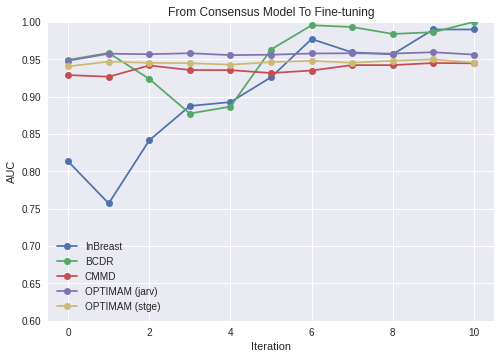

In [12]:
steps = list(range(len(cmmd_metrics['LMLD_val_AUC'][final_r])+1))
plt.plot(steps, [inbreast_metrics['GMLD_AUC'][-1]]+inbreast_metrics['LMLD_val_AUC'][final_r],'-o', label='InBreast')
plt.plot(steps, [bcdr_metrics['GMLD_AUC'][-1]]+bcdr_metrics['LMLD_val_AUC'][final_r],'-o', label='BCDR')
plt.plot(steps, [cmmd_metrics['GMLD_AUC'][-1]]+cmmd_metrics['LMLD_val_AUC'][final_r],'-o', label='CMMD')
plt.plot(steps, [jarv_metrics['GMLD_AUC'][-1]]+jarv_metrics['LMLD_val_AUC'][final_r],'-o', label='OPTIMAM (jarv)')
plt.plot(steps, [stge_metrics['GMLD_AUC'][-1]]+stge_metrics['LMLD_val_AUC'][final_r],'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0.6,1)
plt.ylabel('AUC')
plt.title('From Consensus Model To Fine-tuning')
plt.savefig('./plots/FineTuning-{}.png'.format(clog_path.split('/')[-1][:-11]))

'0214_FAvg4EPR_ResNet50_TUNING'

## Curve

In [7]:
cmmd_losses_local = np.array([cmmd_metrics['local_loss'][i][0] for i in range(len(cmmd_metrics['local_loss'])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_loss'][i][0] for i in range(len(inbreast_metrics['local_loss'])-1)])
stge_losses_local = np.array([stge_metrics['local_loss'][i][0] for i in range(len(stge_metrics['local_loss'])-1)])
jarv_losses_local = np.array([jarv_metrics['local_loss'][i][0] for i in range(len(jarv_metrics['local_loss'])-1)])
bcdr_losses_local = np.array([bcdr_metrics['local_loss'][i][0] for i in range(len(bcdr_metrics['local_loss'])-1)])
steps = range(len(cmmd_losses_local))

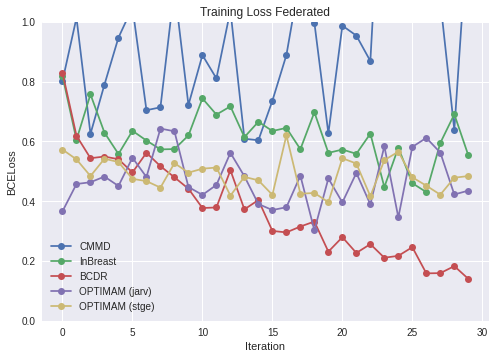

In [8]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Loss Federated')
plt.savefig('./plots/train_loss_per_center_30EPR1FR_MEDIAN.png')

In [ ]:
[cmmd_metrics['local_val_loss'][i] for i in range(len(cmmd_metrics['local_val_loss'])-1)]

In [ ]:
cmmd_losses_local = np.array([cmmd_metrics['local_val_loss'][i] for i in range(len(cmmd_metrics['local_val_loss'])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_val_loss'][i] for i in range(len(inbreast_metrics['local_val_loss'])-1)])
stge_losses_local = np.array([stge_metrics['local_val_loss'][i] for i in range(len(stge_metrics['local_val_loss'])-1)])
jarv_losses_local = np.array([jarv_metrics['local_val_loss'][i] for i in range(len(jarv_metrics['local_val_loss'])-1)])
bcdr_losses_local = np.array([bcdr_metrics['local_val_loss'][i] for i in range(len(bcdr_metrics['local_val_loss'])-1)])
steps = range(len(cmmd_losses_local))

In [ ]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Validation Loss Federated')
plt.savefig('./plots/val_loss_per_center_30EPR1FR_MEDIAN_Laterality.png')

In [ ]:
plt.plot(steps, aggregated_metrics,'-o', label='aggregated')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Each Center Isolation')
plt.savefig('./plots/sanity_check_success1EPR30FR.png')

In [12]:
cmmd_accuracy = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
cmmd_sensitivity = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
cmmd_specificity = [cmmd_metrics['GMLD_true_negatives'][i] / (cmmd_metrics['GMLD_true_negatives'][i] + cmmd_metrics['GMLD_false_positives'][i]) for i in range(len(cmmd_metrics['GMLD_true_negatives']))]
cmmd_f1 = [2 * cmmd_metrics['GMLD_true_positives'][i] / (2 * cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
# cmmd_AUC = [sklearn.metrics.roc_auc_score(cmmd_metrics['GMLD_labels'][i].detach().numpy(), cmmd_metrics['GMLD_predictions'][i].detach().numpy()) for i in range(len(cmmd_metrics['GMLD_true_positives']))]


In [ ]:
cmmd_f1

In [13]:
stge_f1 = [2 * stge_metrics['GMLD_true_positives'][i] / (2 * stge_metrics['GMLD_true_positives'][i] + stge_metrics['GMLD_false_positives'][i] + stge_metrics['GMLD_false_negatives'][i]) for i in range(len(stge_metrics['GMLD_true_positives']))]
jarv_f1 = [2 * jarv_metrics['GMLD_true_positives'][i] / (2 * jarv_metrics['GMLD_true_positives'][i] + jarv_metrics['GMLD_false_positives'][i] + jarv_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]
bcdr_f1 = [2 * bcdr_metrics['GMLD_true_positives'][i] / (2 * bcdr_metrics['GMLD_true_positives'][i] + bcdr_metrics['GMLD_false_positives'][i] + bcdr_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]
inbreast_f1 = [2 * inbreast_metrics['GMLD_true_positives'][i] / (2 * inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]

In [23]:
all_true_positives = inbreast_metrics['GMLD_true_positives'][-1] + stge_metrics['GMLD_true_positives'][-1] + jarv_metrics['GMLD_true_positives'][-1] + bcdr_metrics['GMLD_true_positives'][-1] + cmmd_metrics['GMLD_true_positives'][-1]
all_false_positives = inbreast_metrics['GMLD_false_positives'][-1] + stge_metrics['GMLD_false_positives'][-1] + jarv_metrics['GMLD_false_positives'][-1] + bcdr_metrics['GMLD_false_positives'][-1] + cmmd_metrics['GMLD_false_positives'][-1]
all_false_negatives = inbreast_metrics['GMLD_false_negatives'][-1] + stge_metrics['GMLD_false_negatives'][-1] + jarv_metrics['GMLD_false_negatives'][-1] + bcdr_metrics['GMLD_false_negatives'][-1] + cmmd_metrics['GMLD_false_negatives'][-1]
all_f1 = 2 * all_true_positives / (2 * all_true_positives + all_false_positives + all_false_negatives)

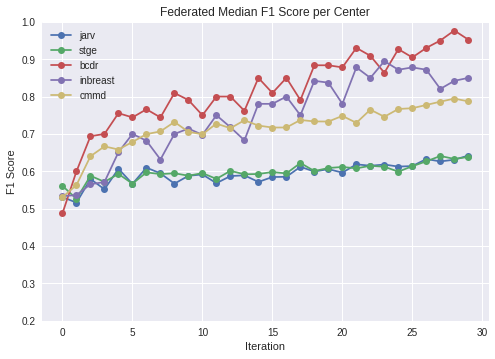

In [14]:
plt.plot(steps, jarv_f1,'-o', label='jarv')
plt.plot(steps, stge_f1,'-o', label='stge')
plt.plot(steps, bcdr_f1,'-o', label='bcdr')
plt.plot(steps, inbreast_f1,'-o', label='inbreast')
plt.plot(steps, cmmd_f1,'-o', label='cmmd')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0.2,1)
plt.ylabel('F1 Score')
plt.title('Federated Median F1 Score per Center')
plt.savefig('./plots/FMedian_F1_LateralityFlipAgain.png')

In [27]:
print(inbreast_f1[-1], cmmd_f1[-1], jarv_f1[-1], stge_f1[-1], bcdr_f1[-1], all_f1) 

0.85 0.7871853546910755 0.6420749279538905 0.6382783882783882 0.9523809523809523 0.6593059936908517


In [ ]:
print(inbreast_metrics[-1], cmmd_f1[-1], jarv_f1[-1], stge_f1[-1], bcdr_f1[-1], all_f1) 

In [28]:
all_true_positives = inbreast_metrics['GMLD_true_positives'][-1] + bcdr_metrics['GMLD_true_positives'][-1] + cmmd_metrics['GMLD_true_positives'][-1]
all_false_positives = inbreast_metrics['GMLD_false_positives'][-1] + bcdr_metrics['GMLD_false_positives'][-1] + cmmd_metrics['GMLD_false_positives'][-1]
all_false_negatives = inbreast_metrics['GMLD_false_negatives'][-1] + bcdr_metrics['GMLD_false_negatives'][-1] + cmmd_metrics['GMLD_false_negatives'][-1]
no_optimam_f1 = 2 * all_true_positives / (2 * all_true_positives + all_false_positives + all_false_negatives)

In [29]:
no_optimam_f1

0.8053949903660886

In [ ]:
inbreast_accuracy = [inbreast_metrics['GMLD_true_positives'][i] / (inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(inbreast_metrics['GMLD_true_positives']))]


In [17]:
cmmd_accuracy

[0.5416666666666666,
 0.5555555555555556,
 0.7129629629629629,
 0.7083333333333334,
 0.7314814814814815,
 0.7037037037037037,
 0.7916666666666666,
 0.7870370370370371,
 0.7777777777777778,
 0.7268518518518519,
 0.7314814814814815,
 0.7546296296296297,
 0.7268518518518519,
 0.7638888888888888,
 0.7407407407407407,
 0.7453703703703703,
 0.7222222222222222,
 0.7731481481481481,
 0.7453703703703703,
 0.7314814814814815,
 0.7638888888888888,
 0.75,
 0.7685185185185185,
 0.7546296296296297,
 0.7685185185185185,
 0.7546296296296297,
 0.8009259259259259,
 0.8009259259259259,
 0.8055555555555556,
 0.7962962962962963]